<a href="https://colab.research.google.com/github/mhabib80/Misc.-Data-Analysis-ML/blob/master/PY4DS%26ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
%cd '/content/drive/MyDrive/Data Science/Python for Data Science and Machine Learning Bootcamp/22-Deep Learning/TensorFlow_FILES/DATA/'

/content/drive/MyDrive/Data Science/Python for Data Science and Machine Learning Bootcamp/22-Deep Learning/TensorFlow_FILES/DATA


# Syntax Basics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Python for Data Science and Machine Learning Bootcamp/22-Deep Learning/TensorFlow_FILES/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['feature1', 'feature2']]
y = df.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
# x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(optimizer = 'rmsprop', loss='mse' )

In [ ]:
model.get_config()

In [ ]:
model.fit(x_train, y_train, epochs=250, verbose=0)

In [ ]:
model.history.history

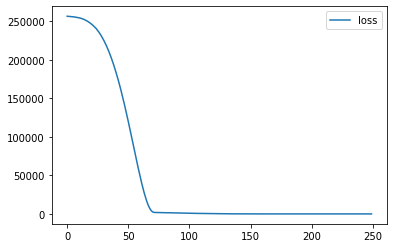

In [ ]:
pd.DataFrame(model.history.history).plot();

In [ ]:
model.evaluate(x_test, y_test, verbose=0) #Mean Square error

25.942398071289062

In [ ]:
model.evaluate(x_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 24.0393


24.03927993774414

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(300,)

In [ ]:
pd.DataFrame(zip(y_pred, y_test.values), columns=['y_pred', 'y_test'])

,y_pred,y_test
0,405.976471,402.296319
1,624.650024,624.156198
2,593.190308,582.455066
3,573.216309,578.588606
4,367.188751,371.224104
...,...,...
295,529.954346,525.704657
296,516.167358,502.909473
297,610.739624,612.727910
298,417.682983,417.569725


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred)

4.117230753050053

In [ ]:
new_gem = scaler.transform([[998,1000]])
model.predict(new_gem)

array([[0.14117652, 0.53968792]])

In [ ]:
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [ ]:
later_model = load_model('my_gem_model.h5')

In [ ]:
later_model.predict(new_gem)

array([[420.3646]], dtype=float32)

# Regression - Housing

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## New Section

In [ ]:
df.shape

(21597, 21)

In [ ]:
df.info()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.corr()['price'].sort_values()

In [ ]:
df.price.quantile(0.95)

1160000.0

In [ ]:
df[df.price>1500000].shape

(516, 23)

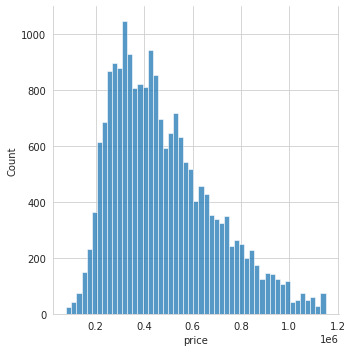

In [ ]:
sns.displot(df.price[df.price < 1160000])

In [ ]:
sns.displot(y_train)

In [ ]:
sns.scatterplot(data=df, x = 'lat', y = 'long', hue = 'price', alpha = 0.5);

In [ ]:
sns.kdeplot(data=df, x = 'lat', y = 'long', shade = 'price');

In [ ]:
df_ = df[~(df['price'] > df['price'].quantile(0.99))]
sns.kdeplot(data=df_, x = 'lat', y = 'long', shade = 'price');

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df.shape

(21597, 23)

## New Section

In [ ]:
x = df[df.price < df.price.quantile(0.95)].drop(['price', 'id', 'date', 'zipcode'], axis=1).values
y = df[df.price < df.price.quantile(0.95)].price.values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x.shape

(20513, 19)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu', input_shape=(19,)))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_6 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_7 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_8 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test),  batch_size=128, epochs=400, verbose=1)

# model.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=400)

In [ ]:
model.evaluate(x_test, y_test, verbose=0) **0.5

88343.16797579765

In [ ]:
hist.history

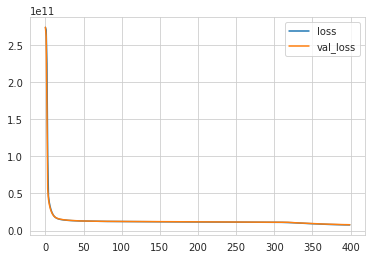

In [ ]:
pd.DataFrame(hist.history).plot();

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mean_absolute_error(y_test, y_pred)

62710.14318981538

In [ ]:
mean_absolute_error(y_test, y_pred) / df[df.price < df.price.quantile(0.95)]['price'].mean()

0.1308905304794801

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

88343.16987230573

In [ ]:
explained_variance_score(y_test,y_pred)

0.8210865964246384

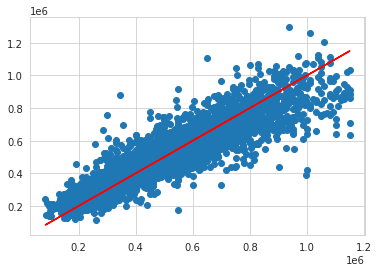

In [ ]:
# Our predictions
plt.scatter(y_test, y_pred)

# Perfect predictions
plt.plot(y_test,y_test,'r');

# Classification - Cancer

In [ ]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape
df.info()
df.describe().T
df.benign_0__mal_1.value_counts()

In [ ]:
x = df.drop('benign_0__mal_1', axis=1).values
y = df.benign_0__mal_1.values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## Model

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation ='sigmoid')) #sigmoid for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              )

In [ ]:
hist = model.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test), verbose=1)

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test, y_test, verbose=0) 

0.23535244166851044

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

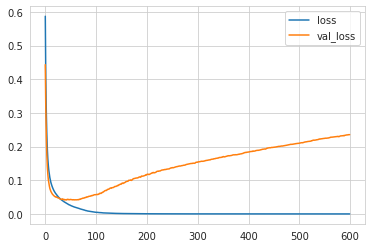

In [ ]:
pd.DataFrame(hist.history).plot();

## Early Stopping

In [ ]:
#recreate model with earlystopping
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation ='sigmoid')) #sigmoid for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [ ]:
hist = model.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

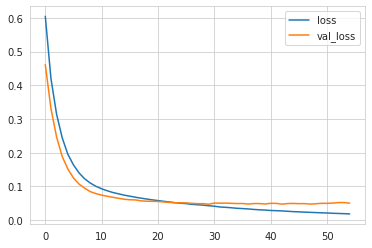

In [ ]:
pd.DataFrame(hist.history).plot();

## Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [ ]:
del model

In [ ]:
#recreate model with drop out
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid')) #sigmoid for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              )

In [ ]:
model.fit(x_train, y_train, epochs=600, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

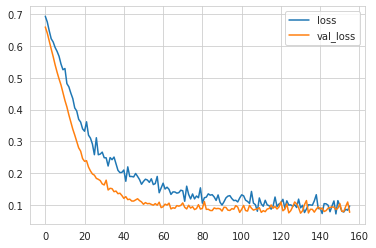

In [ ]:
pd.DataFrame(model.history.history).plot();

In [ ]:
model.predict(x_test)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
#for multiclass classification
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
model.predict(x_test)>0.5

In [ ]:
 #for binary classification
y_pred = (model.predict(x_test)>0.5).astype('int32')

In [ ]:
y_pred

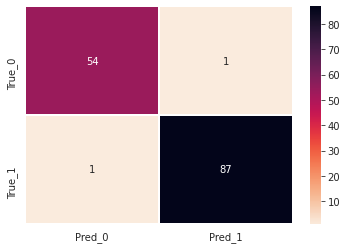

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,   linewidth=0.5, annot=True, cmap='rocket_r', fmt='g')
ax.set_xticklabels(['Pred_0', 'Pred_1'])
ax.set_yticklabels(['True_0', 'True_1']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# Lending Club

In [ ]:
info = pd.read_csv('lending_club_info.csv')
info_dict = {key: value for key, value in zip(info.LoanStatNew, info.Description)}
info.head()

In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
#Export a sample, before processing, for later testing
df.sample(20).to_csv('lending_club_sample.csv')

## EDA

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

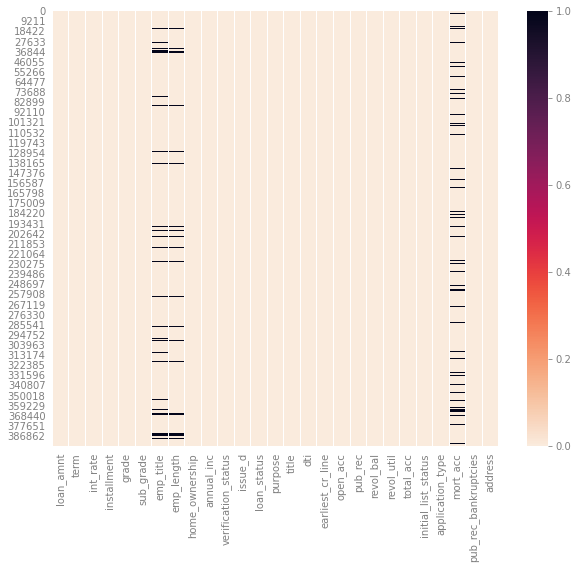

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap='rocket_r');

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
# change loan_status to numeric to measure correlations
df['loan_status'] = df.loan_status.apply(lambda x : 1 if x == 'Fully Paid' else 0)

# Change term to numeric
df['term'] = df.term.str.replace(' months', '').astype(float)

# convert emp_length to numeric
import re
df['emp_length'] = df.emp_length.astype(str).replace('< 1 year', '0').apply(lambda x : re.sub('[^0-9]', '', x))
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [ ]:
df.groupby('loan_status').loan_amnt.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['axes.edgecolor']='black'

plt.rcParams['axes.linewidth']=0.5
plt.rcParams['xtick.color']='grey'
plt.rcParams['ytick.color']='grey'
plt.rc('axes.spines', left=True, top=False, right=False)
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlelocation']= 'left' 
plt.rcParams['axes.titlepad'] = 10

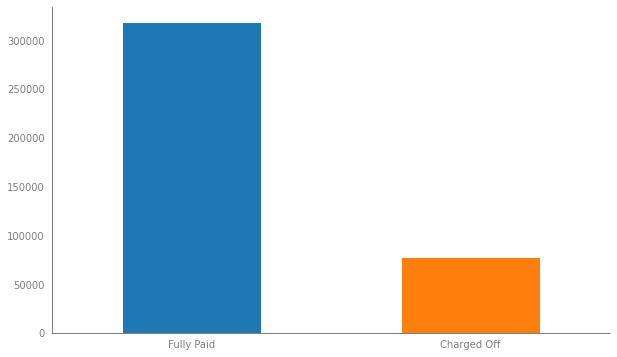

In [ ]:
colors = plt.cm.tab10.colors
df.loan_status.value_counts().plot(kind='bar', rot=00, color=colors );

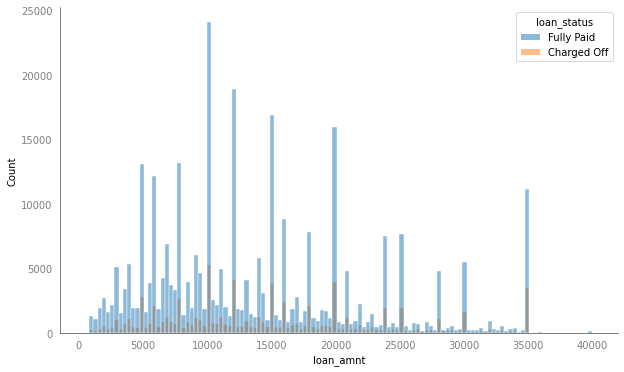

In [ ]:
# df.loan_amnt.hist(bins=50, by = df.loan_status, figsize=(20,10));
# plt.figure(figsize=(16,12))
sns.histplot(data = df, x = df['loan_amnt'],hue='loan_status', color=colors);

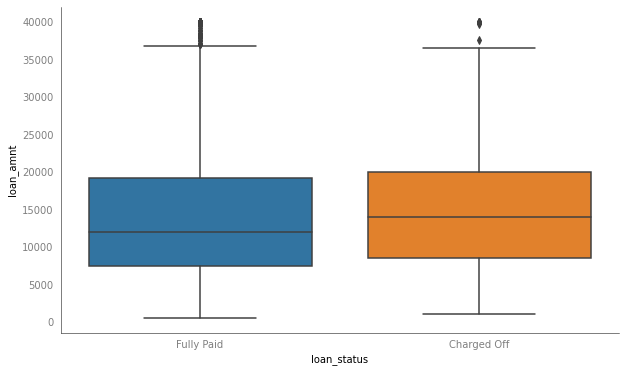

In [ ]:
sns.boxplot(data=df, x = 'loan_status', y = 'loan_amnt')

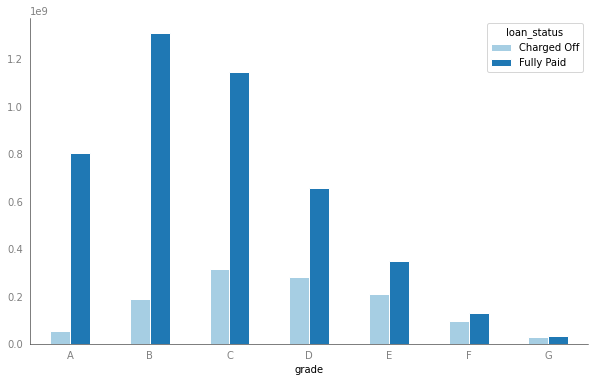

In [ ]:
df.groupby(['grade','loan_status']).loan_amnt.sum().unstack().plot(kind='bar', color=plt.cm.Paired.colors, rot=0);

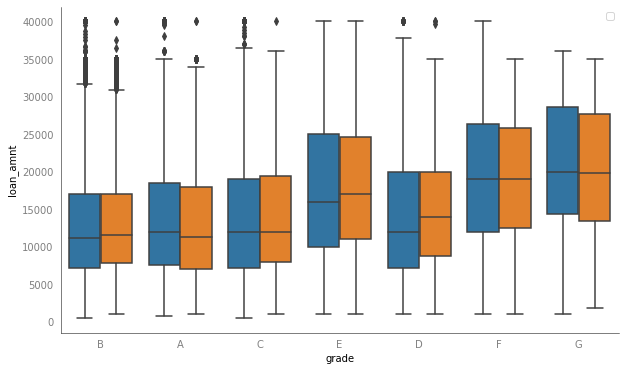

In [ ]:
sns.boxplot(data=df, hue = 'loan_status', y = 'loan_amnt', x='grade');
plt.legend([]);

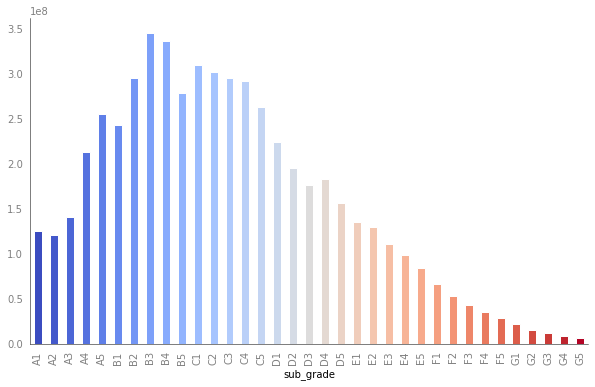

In [ ]:
df.groupby('sub_grade').loan_amnt.sum().plot(kind='bar', color=plt.cm.coolwarm(np.linspace(0,1,df.sub_grade.nunique())));

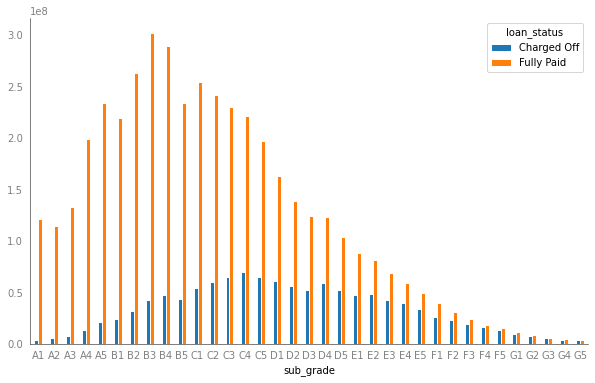

In [ ]:
df.groupby(['sub_grade', 'loan_status']).loan_amnt.sum().unstack().plot(kind='bar', color=colors, rot=0);

In [ ]:
# check emp_length: percent of loan defaults per employment length 
df.groupby('emp_length').apply(lambda g : g['loan_status'].value_counts(normalize=True))[0].plot(kind='bar', rot=30);

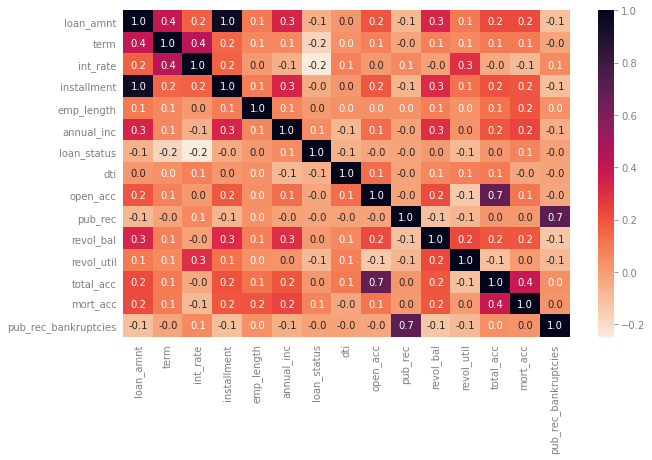

In [ ]:
sns.heatmap(df.corr(), cmap='rocket_r', annot=True, fmt = '0.1f');

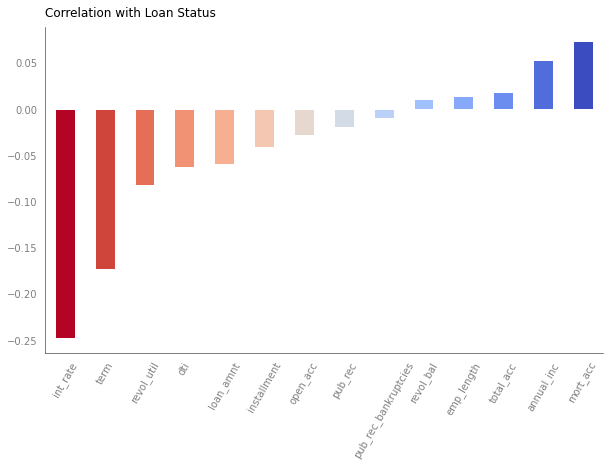

In [ ]:
df.corr()['loan_status'].sort_values()[:-1].plot(kind='bar', color = plt.cm.coolwarm_r(np.linspace(0,1,14)), rot=60)
plt.title('Correlation with Loan Status');

In [ ]:
df.select_dtypes('object').describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,373103,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,7,35,173105,6,3,115,14,48817,684,2,3,393700
top,B,B3,Teacher,MORTGAGE,Verified,Oct-2014,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\nFPO AE 70466
freq,116018,26655,4389,198348,139563,14846,234507,152472,3017,238066,395319,8


## Data Cleaning

In [ ]:
def data_cleaning(df):

  # Change term to numeric
  df.loc[:,'term'] = df['term'].str.replace(' months', '').astype(float)


  #fill missing values in mort_acct
  df.loc[:,'mort_acc'] = df['mort_acc'].fillna(df.groupby('total_acc').mort_acc.transform(np.mean))

  #fill missing values in pub_rec_bankrupcies
  df.loc[:, 'pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.fillna(df.groupby('pub_rec').pub_rec_bankruptcies.transform(np.mean))

  #fill missing values in revol_util
  df.loc[:, 'revol_util'] = df['revol_util'].fillna(df.revol_util.median())

  #reduce unique values for home ownership
  df.loc[:,'home_ownership'] = df.home_ownership.replace(['NONE', 'ANY'], 'OTHER') 

  #extract the zipcode from the address
  df.loc[:,'address'] = df.address.apply(lambda a : a[-5:]) 

  #change the earliest credit line to year
  from datetime import datetime as dt
  df.loc[:,'earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : dt.strptime(x, '%b-%Y', ).year)
  
  # emp_title too many unique values to create dummies
  # tile is redundant with purpose
  # emp_length has little correlation with loan status
  # grade is part of the subgrade
  #drop the loan issue date as we wouldn't know beforehand whether or not a loan would be issued when using our model
  df.drop(columns=['emp_title', 'title', 'emp_length', 'grade', 'issue_d'], axis=1, inplace=True)
  
  #change string columns to categorical and numerical to float
  df.loc[:, df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].astype('category')
  df.loc[:, df.select_dtypes(exclude='category').columns] = df[df.select_dtypes(exclude='category').columns].astype(np.float)

  #get dummies
  df = pd.get_dummies(df, columns=df.select_dtypes('category').columns, drop_first=True)

  return df

df = data_cleaning(df) 

## Preprocessing

### Preprocessing: Categorical Features

In [ ]:
categories = [df[key].cat.categories.tolist() for key in df.select_dtypes('category').keys()]

# One hot encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', categories=categories)
cat_encoded = enc.fit_transform(df.select_dtypes('category')).toarray()
df_cat_encoded = pd.DataFrame(cat_encoded, columns=enc.get_feature_names())
df = pd.concat([df.select_dtypes(exclude='category').reset_index(drop=True), df_cat_encoded], axis=1)
df.head()


# df = pd.get_dummies(df, columns=['home_ownership', 'sub_grade', 'initial_list_status', 'application_type', 'verification_status', 'purpose', 'address'], drop_first=True)
#save the One-hot-encoder model
# import pickle
# with open('encoder', 'wb') as f:
#   pickle.dump(enc, f)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,x0_A2,x0_A3,x0_A4,x0_A5,x0_B1,x0_B2,x0_B3,x0_B4,x0_B5,x0_C1,x0_C2,x0_C3,x0_C4,x0_C5,x0_D1,x0_D2,x0_D3,x0_D4,x0_D5,x0_E1,x0_E2,x0_E3,x0_E4,x0_E5,x0_F1,x0_F2,x0_F3,x0_F4,x0_F5,x0_G1,x0_G2,x0_G3,x0_G4,x0_G5,x1_OTHER,x1_OWN,x1_RENT,x2_Source Verified,x2_Verified,x3_credit_card,x3_debt_consolidation,x3_educational,x3_home_improvement,x3_house,x3_major_purchase,x3_medical,x3_moving,x3_other,x3_renewable_energy,x3_small_business,x3_vacation,x3_wedding,x4_w,x5_INDIVIDUAL,x5_JOINT,x6_05113,x6_11650,x6_22690,x6_29597,x6_30723,x6_48052,x6_70466,x6_86630,x6_93700
0,10000.0,36.0,11.44,329.48,117000.0,1.0,26.24,1990.0,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36.0,11.99,265.68,65000.0,1.0,22.05,2004.0,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36.0,10.49,506.97,43057.0,1.0,12.79,2007.0,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36.0,6.49,220.65,54000.0,1.0,2.60,2006.0,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60.0,17.27,609.33,55000.0,0.0,33.95,1999.0,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing: Train-Test-Split

In [ ]:
# Train-Test-Split data
x = df.drop('loan_status', axis=1)
y = df.loan_status.apply(lambda x : 1 if x == 'Fully Paid' else 0)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Preprocessing: Numerical Features

In [ ]:
# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

#save the scaler model
# with open('scaler', 'wb') as f:
#   pickle.dump(scaler, f)

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [ ]:
clf_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=250, verbose=1, callbacks=[early_stop])

### Model Evaluation

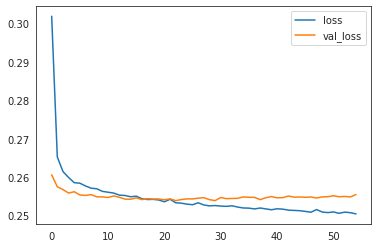

In [ ]:
pd.DataFrame(clf_model.history)[['loss', 'val_loss']].plot();

In [ ]:
y_pred = model.predict(x_test)
y_pred = [round(x[0]) for x in y_pred]

In [ ]:
(y_pred==y_test).sum() / len(y_test)

0.88946544453703

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.48      0.63     15493
         1.0       0.89      0.99      0.93     63713

    accuracy                           0.89     79206
   macro avg       0.90      0.74      0.78     79206
weighted avg       0.89      0.89      0.88     79206



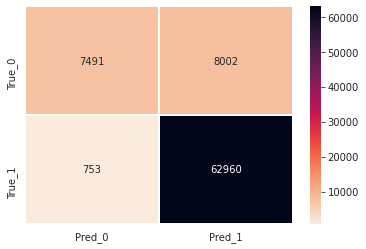

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,   linewidth=0.5, annot=True, cmap='rocket_r', fmt='g')
ax.set_xticklabels(['Pred_0', 'Pred_1'])
ax.set_yticklabels(['True_0', 'True_1']);

In [ ]:
from tensorflow.keras.models import load_model
model.save('Lending_Club.h5')

## Pipeline

In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
# Pipeline Step 1 : Data Cleaning
# Create an inherited class to perform feature engineering/datatype conversions

from sklearn.base import BaseEstimator, TransformerMixin
class data_cleaner(BaseEstimator, TransformerMixin):

  def __init__(self):
    pass

  def fit(self, df, y=None):   
    return self

  def transform(self, df, y=None):
    df.loc[:,'term'] = df['term'].str.replace(' months', '').astype(float)
    df.loc[:,'mort_acc'] = df['mort_acc'].fillna(df.groupby('total_acc').mort_acc.transform(np.mean))
    df.loc[:, 'pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.fillna(df.groupby('pub_rec').pub_rec_bankruptcies.transform(np.mean))
    df.loc[:, 'revol_util'] = df['revol_util'].fillna(df.revol_util.median())
    df.loc[:,'home_ownership'] = df.home_ownership.replace(['NONE', 'ANY'], 'OTHER') 
    df.loc[:,'address'] = df.address.apply(lambda a : a[-5:]) 
    df.loc[:,'earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : dt.strptime(x, '%b-%Y', ).year)        
    df.drop(columns=['emp_title', 'title', 'emp_length', 'grade', 'issue_d'], axis=1, inplace=True)    
    df.loc[:, df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].astype('category')
    df.loc[:, df.select_dtypes(exclude='category').columns] = df[df.select_dtypes(exclude='category').columns].astype(np.float)
    return df

In [ ]:
from pipeline_data_cleaning_class import data_cleaner

In [ ]:
# Train-Test-Split data
x = df.drop('loan_status', axis=1)
y = df.loan_status.apply(lambda x : 1 if x == 'Fully Paid' else 0)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
# Pipeline Step 2 : Preprocessing Numerical & Categorical Data

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# categories = [df[col].cat.categories.tolist() for col in df_0.select_dtypes('category').columns]
categories = [  ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2','C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4','E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
                ['MORTGAGE', 'OTHER', 'OWN', 'RENT'],
                ['Not Verified', 'Source Verified', 'Verified'],
                ['car', 'credit_card', 'debt_consolidation', 'educational','home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
                ['f', 'w'],
                ['DIRECT_PAY', 'INDIVIDUAL', 'JOINT'],
                ['00813', '05113', '11650', '22690', '29597', '30723', '48052', '70466','86630', '93700'] ]

preprocessor = ColumnTransformer(transformers = [ ('num', StandardScaler(), selector(dtype_exclude='category')),
                                                  ('cat', OneHotEncoder(drop='first', categories=categories, sparse=False), selector(dtype_include='category'))])

In [ ]:
from sklearn.pipeline import Pipeline
preprocess_pipeline = Pipeline(steps= [('cleaner', data_cleaner())
                            ,('preprocessor', preprocessor)
                             ])


In [ ]:
preprocess_pipeline.fit_transform(x_train)

In [ ]:
import joblib
if __name__ == '__main__':
  data_cleaner.__module__ = 'pipeline_data_cleaning_class'
  joblib.dump(preprocess_pipeline, 'preprocess_pipeline.pkl')


In [ ]:
# Pipeline step 3 : Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', mode='min', patience=25, verbose=1)

from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(78, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(39, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(18, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model
clf = KerasClassifier(build_fn= create_model,  batch_size=256, epochs=250, verbose=1, callbacks=[early_stop] )

In [ ]:
# Create the Pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps= [('cleaner', data_cleaner())
                            ,('preprocessor', preprocessor)
                            ,('classifier', clf)
                             ])

In [ ]:
clf_model = pipeline.fit(x_train, y_train)

In [ ]:
y_pred = pipeline.predict(x_test)
y_pred

In [ ]:
clf_model.score(x_test, y_test)

In [ ]:
clf_model[2].model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
dropout (Dropout)            (None, 78)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                720       
_________________________________________________________________
dropout_2 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
#save the model
clf_model.named_steps['classifier'].model.save('clm_keras_lending_club.h5')

## Processing & Predicting New Data

In [ ]:
import joblib
preprocessor = joblib.load('preprocess_pipeline.pkl')

In [ ]:
from keras.models import load_model
clf_model = load_model('clm_keras_lending_club.h5')

In [ ]:
raw_new_data = pd.read_csv('lending_club_sample.csv', index_col=[0])
loan_status = raw_new_data.loan_status
raw_new_data = raw_new_data.drop('loan_status', axis=1)

In [ ]:
new_data_processed = preprocessor.transform(raw_new_data)
new_data_processed.shape

In [ ]:
y_pred_0 = clf_model.predict(new_data_processed)
y_pred_0

In [ ]:
(['Fully Paid' if x[0]>0.5 else 'Charged Off' for x in y_pred_0] ==loan_status.values).sum()

17